## Imports Libraries

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
df = pd.read_csv("bn_combo.csv")
df.head()

,headline,description,category,source,url
0,তিন মাসের মধ্যে অক্টোবরে মূল্যস্ফীতি সর্বোচ্চ,দেশে খাদ্য মূল্যস্ফীতি বেড়ে দাঁড়িয়েছে ১২ দশমিক...,business,prothomalo,https://www.prothomalo.com/business/4bej75hq1s
1,অক্টোবরে রপ্তানি আয় বেড়েছে ১৯ শতাংশ,জুলাই-আগস্ট মাসে উৎপাদন খাতে যে ধাক্কা লেগেছিল...,business,prothomalo,https://www.prothomalo.com/business/industry/4...
2,এসিআই ফুডসের চিফ বিজনেস অফিসার ফারিয়া ইয়াসমিন,"ফারিয়া ইয়াসমিন এর আগে নেসলে, ম্যারিকো, বাংলা...",business,prothomalo,https://www.prothomalo.com/business/xk90iae0s1
3,উচ্চ সুদের ঋণ পরিশোধে প্রেফারেন্স শেয়ার ছাড়বে ...,কোম্পানিটি ৩২২টি প্রেফারেন্স শেয়ার ছেড়ে ১৬১ কো...,business,prothomalo,https://www.prothomalo.com/business/market/ldp...
4,সচিব নাজমা মোবারেকের এক ফোনেই আইডিআরএর ৪ সদস্য...,আর্থিক প্রতিষ্ঠান বিভাগ এর আগে আইডিআরএর দুই সা...,business,prothomalo,https://www.prothomalo.com/business/insurance/...


In [44]:
suff_df = df.sample(n=len(df))
suff_df = suff_df.reset_index(drop=True)
suff_df.head()


,headline,description,category,source,url
0,তৈরি পোশাকের মূল্য সংযোজনেও গরমিল,বাংলাদেশ ব্যাংকের সর্বশেষ দুটি ত্রৈমাসিক প্রতি...,business,prothomalo,https://www.prothomalo.com/business/industry/0...
1,চ্যাম্পিয়নস ট্রফিতে খেলে ওয়ানডেকে বিদায় জানাবে...,চ্যাম্পিয়নস ট্রফির সময় নবীর বয়স ৪০ পেরিয়ে যাবে...,sports,prothomalo,https://www.prothomalo.com/sports/cricket/6058...
2,"জাতীয় পার্টি চাপে, বিএনপি মনে করে অযথাই এমন পর...",হঠাৎ জাতীয় পার্টির (জাপা) কেন্দ্রীয় কার্যালয়ে ...,politics,prothomalo,https://www.prothomalo.com/politics/a59ajrxur2
3,তৃতীয় প্রান্তিকে নিট প্রিমিয়াম আয় কমেছে ডেল্টা...,চলতি অর্থবছরের জুলাই-সেপ্টেম্বর সময়ে ডেল্টা লা...,business,prothomalo,https://www.prothomalo.com/business/market/gbk...
4,জাহাঙ্গীরনগর বিশ্ববিদ্যালয় সংস্কারের ৪১ দফা প্...,প্রস্তাবনা পেশ করেন শিবিরের সভাপতি হারুনুর রশি...,politics,prothomalo,https://www.prothomalo.com/bangladesh/district...


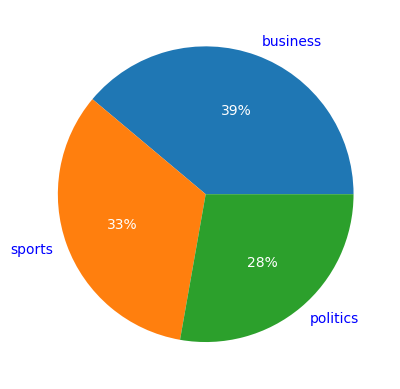

In [45]:

labels = suff_df["category"].unique()
sizes = [len(suff_df[suff_df.category == label]) for label in labels]

wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels,
    autopct="%.0f%%",
    textprops={'color': 'blue'}
)

for autotext in autotexts:
    autotext.set_color('white')

plt.savefig("pie.png", transparent=True, bbox_inches='tight')

In [46]:
suff_df["category"] = suff_df.category.map(
    {"sports": 0, "politics": 1, "business": 2}
)
suff_df.head()

,headline,description,category,source,url
0,তৈরি পোশাকের মূল্য সংযোজনেও গরমিল,বাংলাদেশ ব্যাংকের সর্বশেষ দুটি ত্রৈমাসিক প্রতি...,2,prothomalo,https://www.prothomalo.com/business/industry/0...
1,চ্যাম্পিয়নস ট্রফিতে খেলে ওয়ানডেকে বিদায় জানাবে...,চ্যাম্পিয়নস ট্রফির সময় নবীর বয়স ৪০ পেরিয়ে যাবে...,0,prothomalo,https://www.prothomalo.com/sports/cricket/6058...
2,"জাতীয় পার্টি চাপে, বিএনপি মনে করে অযথাই এমন পর...",হঠাৎ জাতীয় পার্টির (জাপা) কেন্দ্রীয় কার্যালয়ে ...,1,prothomalo,https://www.prothomalo.com/politics/a59ajrxur2
3,তৃতীয় প্রান্তিকে নিট প্রিমিয়াম আয় কমেছে ডেল্টা...,চলতি অর্থবছরের জুলাই-সেপ্টেম্বর সময়ে ডেল্টা লা...,2,prothomalo,https://www.prothomalo.com/business/market/gbk...
4,জাহাঙ্গীরনগর বিশ্ববিদ্যালয় সংস্কারের ৪১ দফা প্...,প্রস্তাবনা পেশ করেন শিবিরের সভাপতি হারুনুর রশি...,1,prothomalo,https://www.prothomalo.com/bangladesh/district...


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    suff_df["headline"], suff_df["category"], test_size=0.2
)

print("Orginal Dataset Contains: ", suff_df.shape[0], "Message")
print("Training  set contains: ", X_train.shape[0], "Message")
print("Testing set Contains: ", X_test.shape[0], "Message")

Orginal Dataset Contains:  180 Message
Training  set contains:  144 Message
Testing set Contains:  36 Message


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
train = count_vector.fit_transform(X_train)
test = count_vector.transform(X_test)

In [49]:
from sklearn.naive_bayes import MultinomialNB

#call the NB method
naive_bayes = MultinomialNB()

#train the model using the dataset
naive_bayes.fit(train, y_train)

MultinomialNB()

In [50]:
import numpy as np
predictions = naive_bayes.predict(test)
print(np.mean(predictions == y_test))

0.5277777777777778


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[5 2 5]
 [3 6 1]
 [4 2 8]]
